In [1]:
import numpy as np
import csv
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)

In [2]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

In [4]:
from sklearn import linear_model

# Dataset 2: Linear Regression

In [43]:
file_path= os.path.expanduser('~/EE219/hw4/housing_data.csv')
df=pd.read_csv(file_path, sep=',',header=None)

In [45]:
df_y=df[13]
df=df.drop([13], axis = 1)

In [35]:
kf = KFold(n_splits=10,random_state=42,shuffle=True)
RMSE_train=[]
RMSE_test=[]
for train_index, test_index in kf.split(df):
    X_train= df.iloc[train_index]
    y_train= df_y.iloc[train_index]
    X_test= df.iloc[test_index]
    y_test= df_y.iloc[test_index]
#     print(X_train)
#     print(y_train)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
print('RMSE for train data=',mean(RMSE_train))
print('RMSE for test data=',mean(RMSE_test))

RMSE for train data= 4.670454144364911
RMSE for test data= 4.792992536004594


In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [53]:
from sklearn.feature_selection import f_regression
_,pval = f_regression((df),(df_y),center=True)
(pval)

array([1.17398708e-19, 5.71358415e-17, 4.90025998e-31, 7.39062317e-05,
       7.06504159e-24, 2.48722887e-74, 1.56998221e-18, 1.20661173e-08,
       5.46593257e-19, 5.63773363e-29, 1.60950948e-34, 1.31811273e-14,
       5.08110339e-88])

In [47]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(df)
est = sm.OLS(df_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     13   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        16:29:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

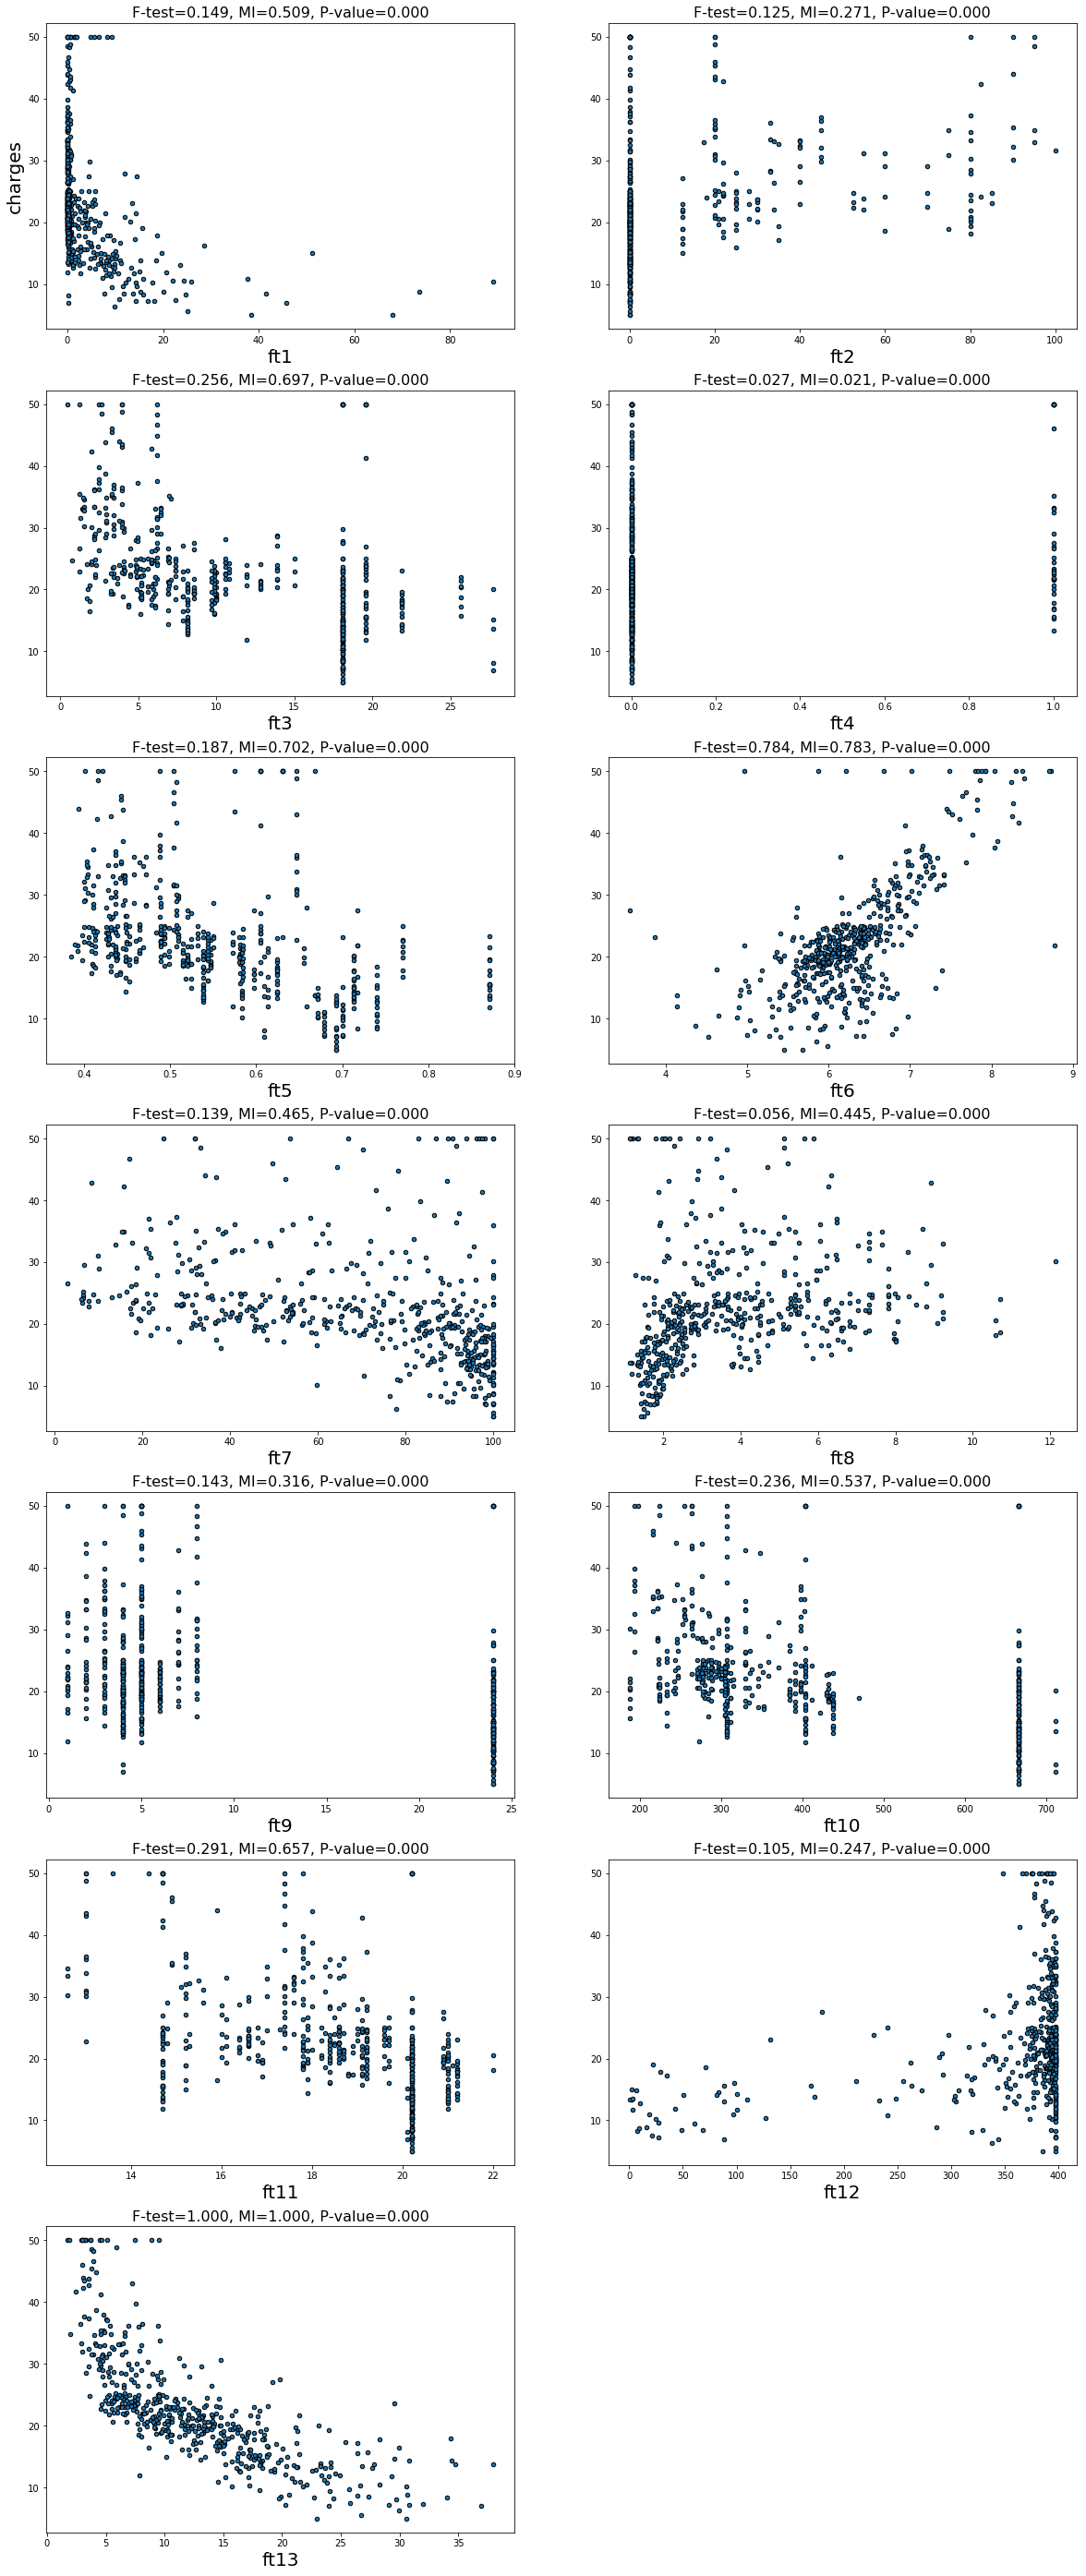

In [40]:
from sklearn.feature_selection import mutual_info_regression
fts = ['ft1','ft2','ft3','ft4','ft5','ft6','ft7','ft8','ft9','ft10','ft11','ft12','ft13']
f_test, P_val = f_regression(df, df_y)
f_test /= np.max(f_test)

mi = mutual_info_regression(df, df_y)
mi /= np.max(mi)

plt.figure(figsize=(20, 50))
for i in range(13):
    plt.subplot(7, 2, i + 1)
    plt.scatter(df.loc[:, i], df_y, edgecolor='black', s=20)
    plt.xlabel("{:s}".format(fts[i]), fontsize=20)
    if i == 0:
        plt.ylabel("charges", fontsize=20)
    plt.title("F-test={:.3f}, MI={:.3f}, P-value={:.3f}".format(f_test[i], mi[i], P_val[i]),
              fontsize=16)
plt.show()

Text(0.5, 0, 'fitted valuse')

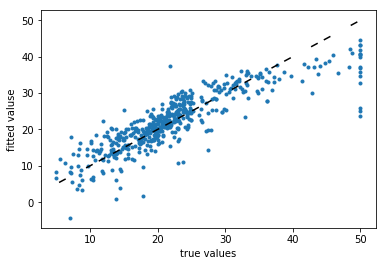

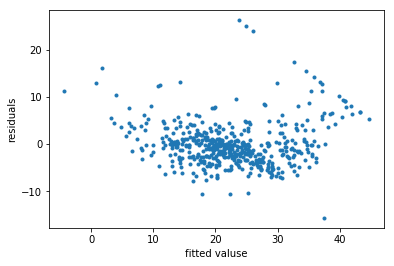

In [15]:
reg = LinearRegression().fit(df, df_y)
pred= reg.predict(df)
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.xlabel('true values')
plt.ylabel('fitted valuse')


plt.figure()
plt.scatter(pred,df_y-pred, marker='.')
plt.ylabel('residuals')
plt.xlabel('fitted valuse')

# Overfitting and Regularization

In [24]:
#Ridge regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,5.06,10,30,50,100]
kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    RMSE_train=[]
    RMSE_test=[]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        reg = linear_model.Ridge(alpha=alpha_value)
        reg.fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
        RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
    print('alpha=',alpha_value)
    print('RMSE for train data=',mean(RMSE_train))
    print('RMSE for test data=',mean(RMSE_test))
    avg_RMSE_train.append(mean(RMSE_train))
    avg_RMSE_test.append(mean(RMSE_test))

alpha= 0.001
RMSE for train data= 4.670454197985355
RMSE for test data= 4.79299077053389
alpha= 0.003
RMSE for train data= 4.67045462555656
RMSE for test data= 4.792987593013063
alpha= 0.01
RMSE for train data= 4.670459437315211
RMSE for test data= 4.792980129418474
alpha= 0.03
RMSE for train data= 4.670500441305105
RMSE for test data= 4.792988876733288
alpha= 0.1
RMSE for train data= 4.670921114118715
RMSE for test data= 4.79332530775069
alpha= 0.3
RMSE for train data= 4.673716856410615
RMSE for test data= 4.7960465276764275
alpha= 0.5
RMSE for train data= 4.677693530626827
RMSE for test data= 4.800076755109023
alpha= 1
RMSE for train data= 4.688537840397278
RMSE for test data= 4.811197259136555
alpha= 3
RMSE for train data= 4.718846284798789
RMSE for test data= 4.84201469623383
alpha= 5
RMSE for train data= 4.734544781904732
RMSE for test data= 4.857461516150736
alpha= 5.06
RMSE for train data= 4.73490045841609
RMSE for test data= 4.857804614875562
alpha= 10
RMSE for train data= 4.75

In [55]:
# for train_index, test_index in kf.split(df):
#     X_train= df.loc[train_index]
#     y_train= df_y.loc[train_index]
#     X_test= df.loc[test_index]
#     y_test= df_y.loc[test_index]
reg = linear_model.Ridge(alpha=0.01)
reg.fit(df, df_y)
reg.coef_ 

array([-1.07954381e-01,  4.64363761e-02,  2.00760699e-02,  2.68500996e+00,
       -1.76521422e+01,  3.81076688e+00,  5.90352236e-04, -1.47388018e+00,
        3.05780592e-01, -1.23436561e-02, -9.51477563e-01,  9.31765360e-03,
       -5.24884868e-01])

In [18]:
#Lasso regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    RMSE_train=[]
    RMSE_test=[]
    for train_index, test_index in kf.split(df):
        X_train= df.loc[train_index]
        y_train= df_y.loc[train_index]
        X_test= df.loc[test_index]
        y_test= df_y.loc[test_index]
        reg = linear_model.Lasso(alpha=alpha_value)
        reg.fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
        RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
    print('alpha=',alpha_value)
    print('RMSE for train data=',mean(RMSE_train))
    print('RMSE for test data=',mean(RMSE_test))
    avg_RMSE_train.append(mean(RMSE_train))
    avg_RMSE_test.append(mean(RMSE_test))

alpha= 0.001
RMSE for train data= 4.670493416939514
RMSE for test data= 4.793080855250757
alpha= 0.003
RMSE for train data= 4.6708074384816545
RMSE for test data= 4.79350744279602
alpha= 0.01
RMSE for train data= 4.674366116730135
RMSE for test data= 4.797535166240189
alpha= 0.03
RMSE for train data= 4.7052545517453055
RMSE for test data= 4.831689718241363
alpha= 0.1
RMSE for train data= 4.7917697372284405
RMSE for test data= 4.9211974916646355
alpha= 0.3
RMSE for train data= 4.8476255866782845
RMSE for test data= 4.9641311217714215
alpha= 0.5
RMSE for train data= 4.9058902891037794
RMSE for test data= 5.025393914716054
alpha= 1
RMSE for train data= 5.170088094751252
RMSE for test data= 5.294695089614016
alpha= 3
RMSE for train data= 5.834668001702449
RMSE for test data= 5.918719832669487
alpha= 5
RMSE for train data= 6.073418033043926
RMSE for test data= 6.131783421071512
alpha= 10
RMSE for train data= 6.338830983440249
RMSE for test data= 6.386479586597042
alpha= 30
RMSE for train da

In [22]:
len(df)

506

In [56]:
# for train_index, test_index in kf.split(df):
#     X_train= df.loc[train_index]
#     y_train= df_y.loc[train_index]
#     X_test= df.loc[test_index]
#     y_test= df_y.loc[test_index]
reg = linear_model.Lasso(alpha=0.001)
reg.fit(df, df_y)
reg.coef_ 

array([-1.07832732e-01,  4.64634501e-02,  1.91502097e-02,  2.66850506e+00,
       -1.74287426e+01,  3.81034855e+00,  4.33367284e-04, -1.47025869e+00,
        3.05293334e-01, -1.23637839e-02, -9.49102624e-01,  9.32916440e-03,
       -5.25320748e-01])

In [21]:
#Elastic Net regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
l1_ratio=[0,0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
#kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    for l1_ratio_value in l1_ratio:
        RMSE_train=[]
        RMSE_test=[]
        for train_index, test_index in kf.split(df):
            X_train= df.loc[train_index]
            y_train= df_y.loc[train_index]
            X_test= df.loc[test_index]
            y_test= df_y.loc[test_index]
            reg = linear_model.ElasticNet(alpha=alpha_value,l1_ratio=l1_ratio_value)
            reg.fit(X_train, y_train)
            pred_train = reg.predict(X_train)
            pred_test = reg.predict(X_test)
            RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
            RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
        print('alpha=',alpha_value,'l1_ratio=',l1_ratio_value)
        print('RMSE for train data=',mean(RMSE_train))
        print('RMSE for test data=',mean(RMSE_test))
        avg_RMSE_train.append(mean(RMSE_train))
        avg_RMSE_test.append(mean(RMSE_test))

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.001 l1_ratio= 0
RMSE for train data= 4.6767546006372145
RMSE for test data= 4.799120287950052
alpha= 0.001 l1_ratio= 0.001
RMSE for train data= 4.67674585822337
RMSE for test data= 4.799111447191912
alpha= 0.001 l1_ratio= 0.003
RMSE for train data= 4.676728378644184
RMSE for test data= 4.799093771753095
alpha= 0.001 l1_ratio= 0.01
RMSE for train data= 4.676667255591985
RMSE for test data= 4.799031973137895
alpha= 0.001 l1_ratio= 0.03
RMSE for train data= 4.676493108095385
RMSE for test data= 4.7988559720370425
alpha= 0.001 l1_ratio= 0.1
RMSE for train data= 4.6758899393430156
RMSE for test data= 4.798247295076251
alpha= 0.001 l1_ratio= 0.3
RMSE for train data= 4.674239742317239
RMSE for test data= 4.796591862502342
alpha= 0.001 l1_ratio= 0.5
RMSE for train data= 4.672753102886435
RMSE for test data= 4.795122279250574
alpha= 0.001 l1_ratio= 1
RMSE for train data= 4.670493416939514
RMSE for test data= 4.793080855250757
alpha= 0.001 l1_ratio= 3
RMSE for train data= 4.983842966302

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.001 l1_ratio= 50
RMSE for train data= 5.102655992402937
RMSE for test data= 5.342313579825566
alpha= 0.001 l1_ratio= 100
RMSE for train data= 4.9704062625196475
RMSE for test data= 5.0546766771460225


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.003 l1_ratio= 0
RMSE for train data= 4.6958272810330275
RMSE for test data= 4.818675049356139
alpha= 0.003 l1_ratio= 0.001
RMSE for train data= 4.695804672445969
RMSE for test data= 4.818652055198589
alpha= 0.003 l1_ratio= 0.003
RMSE for train data= 4.69575941846522
RMSE for test data= 4.818606028611292
alpha= 0.003 l1_ratio= 0.01
RMSE for train data= 4.695600642228891
RMSE for test data= 4.818444532026053
alpha= 0.003 l1_ratio= 0.03
RMSE for train data= 4.695143665644805
RMSE for test data= 4.817979646470151
alpha= 0.003 l1_ratio= 0.1
RMSE for train data= 4.693505139263012
RMSE for test data= 4.816311884340679
alpha= 0.003 l1_ratio= 0.3
RMSE for train data= 4.688490139481793
RMSE for test data= 4.811192002815087
alpha= 0.003 l1_ratio= 0.5
RMSE for train data= 4.683030545610797
RMSE for test data= 4.805623243450896
alpha= 0.003 l1_ratio= 1
RMSE for train data= 4.6708074384816545
RMSE for test data= 4.79350744279602
alpha= 0.003 l1_ratio= 3
RMSE for train data= inf
RMSE for tes

F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors =

alpha= 0.003 l1_ratio= 5
RMSE for train data= 9.187066923162694
RMSE for test data= 9.17506805688015
alpha= 0.003 l1_ratio= 10
RMSE for train data= 4.795472032329537
RMSE for test data= 4.93981660144729


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.003 l1_ratio= 30
RMSE for train data= 4.99048430640713
RMSE for test data= 5.056854721638916
alpha= 0.003 l1_ratio= 50
RMSE for train data= 5.279343261143631
RMSE for test data= 5.415240347295011
alpha= 0.003 l1_ratio= 100
RMSE for train data= 1.6388839872833423e+95
RMSE for test data= 2.1890601439933546e+95


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.01 l1_ratio= 0
RMSE for train data= 4.731737276528432
RMSE for test data= 4.854748566500069
alpha= 0.01 l1_ratio= 0.001
RMSE for train data= 4.7317147143574445
RMSE for test data= 4.854727512778823
alpha= 0.01 l1_ratio= 0.003
RMSE for train data= 4.7316695066445575
RMSE for test data= 4.854685320265899
alpha= 0.01 l1_ratio= 0.01
RMSE for train data= 4.7315103977271376
RMSE for test data= 4.854536737353749
alpha= 0.01 l1_ratio= 0.03
RMSE for train data= 4.731048091527491
RMSE for test data= 4.854104300339453
alpha= 0.01 l1_ratio= 0.1
RMSE for train data= 4.729333708095867
RMSE for test data= 4.852491860783844
alpha= 0.01 l1_ratio= 0.3
RMSE for train data= 4.723407298417471
RMSE for test data= 4.846825020376583
alpha= 0.01 l1_ratio= 0.5
RMSE for train data= 4.715249190965398
RMSE for test data= 4.83882944295528
alpha= 0.01 l1_ratio= 1
RMSE for train data= 4.674366116730135
RMSE for test data= 4.797535166240189


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.01 l1_ratio= 3
RMSE for train data= 4.825393161773608
RMSE for test data= 4.961271178713188
alpha= 0.01 l1_ratio= 5
RMSE for train data= 4.825644829154877
RMSE for test data= 4.992386641807546


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.01 l1_ratio= 10
RMSE for train data= 4.963105218800016
RMSE for test data= 5.036095422567999
alpha= 0.01 l1_ratio= 30
RMSE for train data= 3.989723962703964e+83
RMSE for test data= 5.35947816470041e+83
alpha= 0.01 l1_ratio= 50
RMSE for train data= 9.187066923162694
RMSE for test data= 9.17506805688015


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.01 l1_ratio= 100
RMSE for train data= 5.567643265164773
RMSE for test data= 5.788223923484189
alpha= 0.03 l1_ratio= 0
RMSE for train data= 4.7631763225726935
RMSE for test data= 4.883843588866859
alpha= 0.03 l1_ratio= 0.001
RMSE for train data= 4.763161858943819
RMSE for test data= 4.883833711182609
alpha= 0.03 l1_ratio= 0.003
RMSE for train data= 4.763132906882441
RMSE for test data= 4.883813939820294
alpha= 0.03 l1_ratio= 0.01
RMSE for train data= 4.763031312539856
RMSE for test data= 4.883744569112355
alpha= 0.03 l1_ratio= 0.03
RMSE for train data= 4.762738728514948
RMSE for test data= 4.883544798026119
alpha= 0.03 l1_ratio= 0.1
RMSE for train data= 4.761684701808653
RMSE for test data= 4.882824406748055
alpha= 0.03 l1_ratio= 0.3
RMSE for train data= 4.758311792113612
RMSE for test data= 4.880487064037068
alpha= 0.03 l1_ratio= 0.5
RMSE for train data= 4.753946461398107
RMSE for test data= 4.877297944080757
alpha= 0.03 l1_ratio= 1
RMSE for train data= 4.7052545517453055
RMSE

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.03 l1_ratio= 5
RMSE for train data= 4.99703976414594
RMSE for test data= 5.110584832634331
alpha= 0.03 l1_ratio= 10
RMSE for train data= 1.3176470568603929e+53
RMSE for test data= 1.8016250831748887e+53
alpha= 0.03 l1_ratio= 30
RMSE for train data= 5.362268990251509
RMSE for test data= 5.513699368439429


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.03 l1_ratio= 50
RMSE for train data= 4.455220784258461e+61
RMSE for test data= 5.478250983720843e+61
alpha= 0.03 l1_ratio= 100
RMSE for train data= 6.561337367657595
RMSE for test data= 6.771333113978452
alpha= 0.1 l1_ratio= 0
RMSE for train data= 4.81457010217806
RMSE for test data= 4.930576076156075
alpha= 0.1 l1_ratio= 0.001
RMSE for train data= 4.814542774884451
RMSE for test data= 4.930554616290689


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.1 l1_ratio= 0.003
RMSE for train data= 4.8144881453371955
RMSE for test data= 4.930511735314691
alpha= 0.1 l1_ratio= 0.01
RMSE for train data= 4.814297228350121
RMSE for test data= 4.930362178726474
alpha= 0.1 l1_ratio= 0.03
RMSE for train data= 4.813754286632456
RMSE for test data= 4.929939229001791
alpha= 0.1 l1_ratio= 0.1
RMSE for train data= 4.811888392287888
RMSE for test data= 4.928518094441328
alpha= 0.1 l1_ratio= 0.3
RMSE for train data= 4.807028273821219
RMSE for test data= 4.925183314965093
alpha= 0.1 l1_ratio= 0.5
RMSE for train data= 4.803563205380606
RMSE for test data= 4.923731828768249
alpha= 0.1 l1_ratio= 1
RMSE for train data= 4.7917697372284405
RMSE for test data= 4.9211974916646355
alpha= 0.1 l1_ratio= 3
RMSE for train data= 6.994577275481727
RMSE for test data= 7.2988226772350835


F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors =

alpha= 0.1 l1_ratio= 5
RMSE for train data= inf
RMSE for test data= inf
alpha= 0.1 l1_ratio= 10
RMSE for train data= 5.322581026423947
RMSE for test data= 5.471959390413309
alpha= 0.1 l1_ratio= 30
RMSE for train data= 5.868163567323117
RMSE for test data= 6.01301016115168


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha= 0.1 l1_ratio= 50
RMSE for train data= 5.99120256992379
RMSE for test data= 6.054576232575646
alpha= 0.1 l1_ratio= 100
RMSE for train data= 6.047900086037336
RMSE for test data= 6.120564023269544
alpha= 0.3 l1_ratio= 0
RMSE for train data= 4.922915426332638
RMSE for test data= 5.035264844699979


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.3 l1_ratio= 0.001
RMSE for train data= 4.922877674727479
RMSE for test data= 5.035233492142564
alpha= 0.3 l1_ratio= 0.003
RMSE for train data= 4.922802151830431
RMSE for test data= 5.035170807476259
alpha= 0.3 l1_ratio= 0.01
RMSE for train data= 4.9225376044733
RMSE for test data= 5.034951434314089
alpha= 0.3 l1_ratio= 0.03
RMSE for train data= 4.9217802110956805
RMSE for test data= 5.034325164677921
alpha= 0.3 l1_ratio= 0.1
RMSE for train data= 4.9191175654665145
RMSE for test data= 5.032151287124808
alpha= 0.3 l1_ratio= 0.3
RMSE for train data= 4.909753998061021
RMSE for test data= 5.0240045433297285
alpha= 0.3 l1_ratio= 0.5
RMSE for train data= 4.899053730435519
RMSE for test data= 5.014398132592621
alpha= 0.3 l1_ratio= 1
RMSE for train data= 4.8476255866782845
RMSE for test data= 4.9641311217714215


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.3 l1_ratio= 3
RMSE for train data= 5.47820733028509
RMSE for test data= 5.614400424669406
alpha= 0.3 l1_ratio= 5
RMSE for train data= 766598097795.2949
RMSE for test data= 946829019275.924
alpha= 0.3 l1_ratio= 10
RMSE for train data= 5.595727493465377
RMSE for test data= 5.69808471077204
alpha= 0.3 l1_ratio= 30
RMSE for train data= 6.0354787300412225
RMSE for test data= 6.105720753407654
alpha= 0.3 l1_ratio= 50
RMSE for train data= 6.152971570250934
RMSE for test data= 6.206430530630433
alpha= 0.3 l1_ratio= 100
RMSE for train data= 7.527991341405092
RMSE for test data= 7.631055961068098
alpha= 0.5 l1_ratio= 0
RMSE for train data= 4.997630801980253
RMSE for test data= 5.108062731449613


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.5 l1_ratio= 0.001
RMSE for train data= 4.997615496827358
RMSE for test data= 5.108055717695886
alpha= 0.5 l1_ratio= 0.003
RMSE for train data= 4.997584903955316
RMSE for test data= 5.108041732696962
alpha= 0.5 l1_ratio= 0.01
RMSE for train data= 4.997478059500582
RMSE for test data= 5.107993483080748
alpha= 0.5 l1_ratio= 0.03
RMSE for train data= 4.997174983538679
RMSE for test data= 5.107860157206176
alpha= 0.5 l1_ratio= 0.1
RMSE for train data= 4.996094447546385
RMSE for test data= 5.107370744743984
alpha= 0.5 l1_ratio= 0.3
RMSE for train data= 4.990597306527459
RMSE for test data= 5.103776156170217
alpha= 0.5 l1_ratio= 0.5
RMSE for train data= 4.978115031372921
RMSE for test data= 5.091754942167706
alpha= 0.5 l1_ratio= 1
RMSE for train data= 4.9058902891037794
RMSE for test data= 5.025393914716054
alpha= 0.5 l1_ratio= 3
RMSE for train data= 5.287397284308148
RMSE for test data= 5.433092049525654
alpha= 0.5 l1_ratio= 5
RMSE for train data= 5.543527472935548
RMSE for test dat

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 1 l1_ratio= 0.01
RMSE for train data= 5.117344256348298
RMSE for test data= 5.224044975927302
alpha= 1 l1_ratio= 0.03
RMSE for train data= 5.118568088904689
RMSE for test data= 5.225487669731718
alpha= 1 l1_ratio= 0.1
RMSE for train data= 5.1225534214775035
RMSE for test data= 5.2302340633029925
alpha= 1 l1_ratio= 0.3
RMSE for train data= 5.132318024779549
RMSE for test data= 5.241162315532595
alpha= 1 l1_ratio= 0.5
RMSE for train data= 5.140821888032432
RMSE for test data= 5.2507226284140724
alpha= 1 l1_ratio= 1
RMSE for train data= 5.170088094751252
RMSE for test data= 5.294695089614016
alpha= 1 l1_ratio= 3
RMSE for train data= 5.656347286628558
RMSE for test data= 5.754783772979069
alpha= 1 l1_ratio= 5
RMSE for train data= 5.998728322417246
RMSE for test data= 6.061026190049253
alpha= 1 l1_ratio= 10
RMSE for train data= 6.0653208358377295
RMSE for test data= 6.136105697522762
alpha= 1 l1_ratio= 30
RMSE for train data= 7.5886828849720445
RMSE for test data= 7.680481984502392
a

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 3 l1_ratio= 0.003
RMSE for train data= 5.354459904594822
RMSE for test data= 5.450939626985757
alpha= 3 l1_ratio= 0.01
RMSE for train data= 5.356645419568112
RMSE for test data= 5.453236247602141
alpha= 3 l1_ratio= 0.03
RMSE for train data= 5.362944797206565
RMSE for test data= 5.459880421739735
alpha= 3 l1_ratio= 0.1
RMSE for train data= 5.386209398646689
RMSE for test data= 5.483276519887506
alpha= 3 l1_ratio= 0.3
RMSE for train data= 5.4675362027495265
RMSE for test data= 5.561629918157521
alpha= 3 l1_ratio= 0.5
RMSE for train data= 5.587051509906293
RMSE for test data= 5.680845498611604
alpha= 3 l1_ratio= 1
RMSE for train data= 5.834668001702449
RMSE for test data= 5.918719832669487
alpha= 3 l1_ratio= 3
RMSE for train data= 6.0970552118306465
RMSE for test data= 6.162898978585977
alpha= 3 l1_ratio= 5
RMSE for train data= 6.227903997269459
RMSE for test data= 6.272316349512004
alpha= 3 l1_ratio= 10
RMSE for train data= 7.683484834848989
RMSE for test data= 7.756802841592095
a

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 5 l1_ratio= 0
RMSE for train data= 5.495017293232296
RMSE for test data= 5.584823112456609
alpha= 5 l1_ratio= 0.001
RMSE for train data= 5.4955302928148235
RMSE for test data= 5.585357745405645
alpha= 5 l1_ratio= 0.003
RMSE for train data= 5.496558812520468
RMSE for test data= 5.586427618494577
alpha= 5 l1_ratio= 0.01
RMSE for train data= 5.500162063437781
RMSE for test data= 5.590179722067758
alpha= 5 l1_ratio= 0.03
RMSE for train data= 5.510771932940027
RMSE for test data= 5.601240689730465
alpha= 5 l1_ratio= 0.1
RMSE for train data= 5.550027198658398
RMSE for test data= 5.640712148201954
alpha= 5 l1_ratio= 0.3
RMSE for train data= 5.698792331616642
RMSE for test data= 5.786526505854565
alpha= 5 l1_ratio= 0.5
RMSE for train data= 5.8526578958337385
RMSE for test data= 5.936081111801085
alpha= 5 l1_ratio= 1
RMSE for train data= 6.073418033043926
RMSE for test data= 6.131783421071512
alpha= 5 l1_ratio= 3
RMSE for train data= 6.290480599342822
RMSE for test data= 6.33900313428578

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 10 l1_ratio= 0.01
RMSE for train data= 5.746226305885293
RMSE for test data= 5.825787876850312
alpha= 10 l1_ratio= 0.03
RMSE for train data= 5.765480286663175
RMSE for test data= 5.845596098030146
alpha= 10 l1_ratio= 0.1
RMSE for train data= 5.838862084478498
RMSE for test data= 5.919748958511338
alpha= 10 l1_ratio= 0.3
RMSE for train data= 6.071888188597061
RMSE for test data= 6.14563108976205
alpha= 10 l1_ratio= 0.5
RMSE for train data= 6.202273043479896
RMSE for test data= 6.2571036809130645
alpha= 10 l1_ratio= 1
RMSE for train data= 6.338830983440249
RMSE for test data= 6.386479586597042
alpha= 10 l1_ratio= 3
RMSE for train data= 7.782946765235616
RMSE for test data= 7.834314018459369
alpha= 10 l1_ratio= 5
RMSE for train data= 8.029328601118271
RMSE for test data= 8.04657398114406
alpha= 10 l1_ratio= 10
RMSE for train data= 8.086226096690295
RMSE for test data= 8.104874967000683
alpha= 10 l1_ratio= 30
RMSE for train data= 8.302985181476183
RMSE for test data= 8.3142155044072

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 30 l1_ratio= 0.001
RMSE for train data= 6.296013061391025
RMSE for test data= 6.358239722485731
alpha= 30 l1_ratio= 0.003
RMSE for train data= 6.300309613302821
RMSE for test data= 6.362632108443195
alpha= 30 l1_ratio= 0.01
RMSE for train data= 6.31557272861209
RMSE for test data= 6.378233982609547
alpha= 30 l1_ratio= 0.03
RMSE for train data= 6.360201371920474
RMSE for test data= 6.423887078128363
alpha= 30 l1_ratio= 0.1
RMSE for train data= 6.525288054981371
RMSE for test data= 6.586339644167758
alpha= 30 l1_ratio= 0.3
RMSE for train data= 6.725027485369012
RMSE for test data= 6.763877172229106
alpha= 30 l1_ratio= 0.5
RMSE for train data= 6.913930228188633
RMSE for test data= 6.9550818984884675
alpha= 30 l1_ratio= 1
RMSE for train data= 7.834511557291309
RMSE for test data= 7.8770780799372355
alpha= 30 l1_ratio= 3
RMSE for train data= 8.072091196740093
RMSE for test data= 8.090217713842623
alpha= 30 l1_ratio= 5
RMSE for train data= 8.162377968473006
RMSE for test data= 8.17578

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 50 l1_ratio= 0
RMSE for train data= 6.607870841226202
RMSE for test data= 6.6628310057343025
alpha= 50 l1_ratio= 0.001
RMSE for train data= 6.610881055344295
RMSE for test data= 6.665899579027028
alpha= 50 l1_ratio= 0.003
RMSE for train data= 6.61694178529979
RMSE for test data= 6.672081318523707
alpha= 50 l1_ratio= 0.01
RMSE for train data= 6.63818788666475
RMSE for test data= 6.693392430958831
alpha= 50 l1_ratio= 0.03
RMSE for train data= 6.69961247036956
RMSE for test data= 6.752736685722142
alpha= 50 l1_ratio= 0.1
RMSE for train data= 6.869485433633603
RMSE for test data= 6.907731512469881
alpha= 50 l1_ratio= 0.3
RMSE for train data= 7.1481255203349
RMSE for test data= 7.185764441882456
alpha= 50 l1_ratio= 0.5
RMSE for train data= 7.571924271765396
RMSE for test data= 7.613565600427541
alpha= 50 l1_ratio= 1
RMSE for train data= 8.0296540202212
RMSE for test data= 8.046847108881435
alpha= 50 l1_ratio= 3
RMSE for train data= 8.162639044331494
RMSE for test data= 8.176027097379

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 100 l1_ratio= 0
RMSE for train data= 7.008470628672189
RMSE for test data= 7.054465533378094
alpha= 100 l1_ratio= 0.001
RMSE for train data= 7.012345168280449
RMSE for test data= 7.058415712210559
alpha= 100 l1_ratio= 0.003
RMSE for train data= 7.020120235635764
RMSE for test data= 7.066342432115535
alpha= 100 l1_ratio= 0.01
RMSE for train data= 7.047464391006818
RMSE for test data= 7.094211420536554
alpha= 100 l1_ratio= 0.03
RMSE for train data= 7.126353339619695
RMSE for test data= 7.174473461625659
alpha= 100 l1_ratio= 0.1
RMSE for train data= 7.297129582235737
RMSE for test data= 7.336646800932959
alpha= 100 l1_ratio= 0.3
RMSE for train data= 7.867666728271276
RMSE for test data= 7.905245933329555
alpha= 100 l1_ratio= 0.5
RMSE for train data= 8.03006456297734
RMSE for test data= 8.047192463868125
alpha= 100 l1_ratio= 1
RMSE for train data= 8.086964752202087
RMSE for test data= 8.105464630421434
alpha= 100 l1_ratio= 3
RMSE for train data= 8.304712911560278
RMSE for test data=

In [57]:
#best model  alpha= 0.001 l1_ratio= 1
# for train_index, test_index in kf.split(df):
#     X_train= df.loc[train_index]
#     y_train= df_y.loc[train_index]
#     X_test= df.loc[test_index]
#     y_test= df_y.loc[test_index]
reg = linear_model.ElasticNet(alpha=0.001,l1_ratio=1)
reg.fit(df, df_y)
reg.coef_ 

array([-1.07832732e-01,  4.64634501e-02,  1.91502097e-02,  2.66850506e+00,
       -1.74287426e+01,  3.81034855e+00,  4.33367284e-04, -1.47025869e+00,
        3.05293334e-01, -1.23637839e-02, -9.49102624e-01,  9.32916440e-03,
       -5.25320748e-01])